## Characterization of  Nd:YAG Laser; Laser Radiation; Interferometry
    S M Firoj Mahmud, Matr. No.: 5057900, Hochschule Bremen.
        
    This python script is the simulation and data analysis part of a Project of Laser System and Application course by Prof. Dr. Thomas Henning, Hochschule Bremen.The objectives of the project is to analyse aspects of the setup and operation 
    principles of a Nd YAG laser.
    

### Problem 1: Estimation of Rate Equation of 4 level system
The rate equation model for a optically pumped four-level laser system.
    


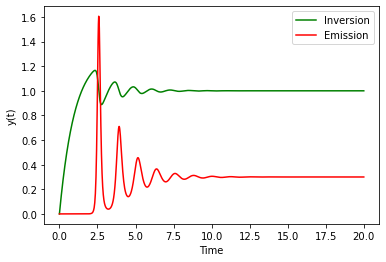

<Figure size 432x288 with 0 Axes>

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

 # initial conditions, some computed values considered
t_0=0 # initial time

f=0.0001 # spontaneous emission
row_0=0 # stimulated emission
d_0=0     #population inversion
w=1.3 # atom pumping rate
r = 90 #photon losses
t_max=20


npts=1000
# function that returns dy/dt
def dz(z,t):
        dddt=w-z[1]*z[0]-z[0]
        drowdt=r*z[0]*z[1]-r*z[1]+f*z[0]
        dzdt=[dddt,drowdt]
        return dzdt     #return dydt
        #%%time points
        
t = np.linspace(t_0,t_max,npts)

# solve ODE
z = odeint(dz,[d_0,row_0],t)

#%% plot results

plt.plot(t,z[:,0],'g', label='Inversion')
plt.plot(t,z[:,1],'r',label='Emission')
plt.xlabel('Time')
plt.ylabel('y(t)')
plt.legend()

plt.show()
plt.savefig('inversion.png')

# 2. laser Radiation

### 2.1 Gaussian Laser Beam Propagation Model(using gaussian Distribution Equation)

In [2]:

from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,colorbar,title,show
#from mpl_toolkits.mplot3d import Axes3D

from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
x_0=0
y_0=0
w_0=2 # waist at position zero
# the 3 functions that I'm going to plot
def I_1(x,y):
     return exp(-2*((x-x_0)**2+(y-y_0)**2)/w_0**2) #I_1, 
def I_2(x,y):
     return exp(-2*((x-x_0)/w_0)**10-2*((y-y_0)/w_0)**10) #I_2, 2.sg=10
def I_3(x,y):
      return ((x-x_0)**2 + (y-y_0)**2)*exp(-2*((x-x_0)**2+(y-y_0)**2)/w_0**2) #I_3
x = arange(-6.0,6.0,0.1)
y = arange(-6.0,6.0,0.1)
X,Y = meshgrid(x, y) # grid of point
I_1 = I_1(X, Y) # evaluation of the function on the grid
I_2 = I_2(X, Y)
I_3 = I_3(X, Y)

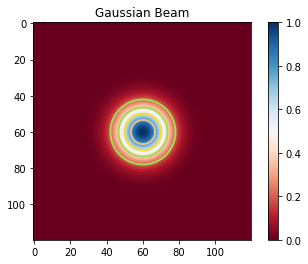

C:\Users\Firoj\AppData\Local\Temp/ipykernel_9248/250969806.py:11: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


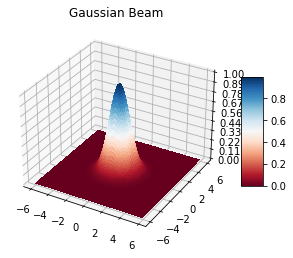

In [3]:
#2d plot of Gaussian Beam
im = imshow(I_1,cmap=cm.RdBu) # drawing the function
cset = contour(I_1,arange(-1,1.5,0.2),linewidths=2,cmap=cm.Set2)
colorbar(im) # adding the colobar on the right
title('Gaussian Beam')
show()

#3D plot of gaussian Beam

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
surf = ax.plot_surface(X, Y, I_1, rstride=1, cstride=1, 
cmap=cm.RdBu,linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
title('Gaussian Beam')
plt.show()


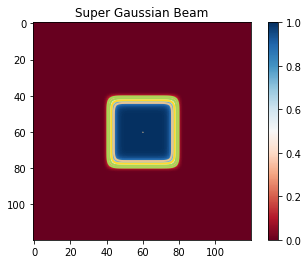

C:\Users\Firoj\AppData\Local\Temp/ipykernel_9248/888573275.py:10: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
C:\Users\Firoj\AppData\Local\Temp/ipykernel_9248/888573275.py:13: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(surf, shrink=0.5, aspect=5)


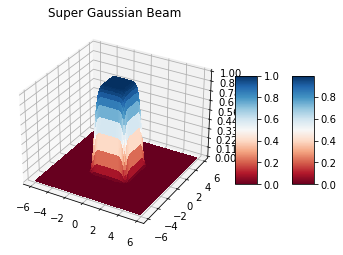

In [4]:
#2D plot of Super Gaussian Beam

im = imshow(I_2,cmap=cm.RdBu) # drawing the function
cset = contour(I_2,arange(-1,1.5,0.2),linewidths=2,cmap=cm.Set2)
colorbar(im) # adding the colobar on the right
title('Super Gaussian Beam')
show()
#%%
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)
surf = ax.plot_surface(X, Y, I_2, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
title('Super Gaussian Beam')
plt.show()



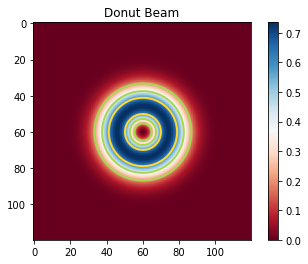

C:\Users\Firoj\AppData\Local\Temp/ipykernel_9248/2531531046.py:10: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


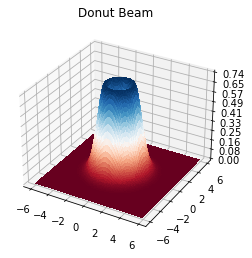

In [5]:
#2d plot of donut beam
im = imshow(I_3,cmap=cm.RdBu) # drawing the function
cset = contour(I_3,arange(-1,1.5,0.2),linewidths=2,cmap=cm.Set2)
colorbar(im) # adding the colobar on the right
title('Donut Beam')
show()

#3D plotof Donut Beam
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
surf = ax.plot_surface(X, Y, I_3, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)
title('Donut Beam')
plt.show()

### 2.2 Comparision of density of three distributions

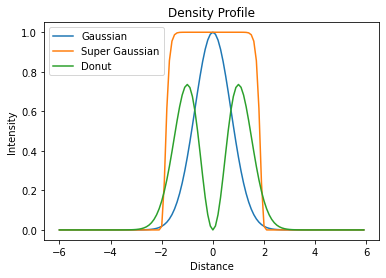

In [6]:
from numpy import exp,arange
import matplotlib.pyplot as plt
from pylab import *

x_0=0
y_0=0
w_0=2 # waist at position zero
# the 3 functions that I'm going to plot
def I_1(x,y):
     return exp(-2*((x-x_0)**2+(y-y_0)**2)/w_0**2) #I_1, 
def I_2(x,y):
     return exp(-2*((x-x_0)/w_0)**20-2*((y-y_0)/w_0)**20) #I_2, 2.sg=20
def I_3(x,y):
      return ((x-x_0)**2 + (y-y_0)**2)*exp(-2*((x-x_0)**2+(y-y_0)**2)/w_0**2) #I_3
x = arange(-6.0,6.0,0.1)
y = arange(-6.0,6.0,0.1)

I_1 = I_1(x, y) # evaluation of the function on the grid
I_2 = I_2(x, y)
I_3 = I_3(x, y)

I_e=I_1*exp(-2)
fig, ax = plt.subplots()
ax.plot(x, I_1, label="Gaussian")
ax.plot(x, I_2, label="Super Gaussian")
ax.plot(x, I_3, label="Donut")
ax.legend(loc=2); # upper left corner
ax.set_xlabel('Distance')
ax.set_ylabel('Intensity')
ax.set_title('Density Profile');

### 2.3 Determination of Beam Radius

Rayleigh length(nm):  1
Wasit at z position(nm):  2.0071562785889867


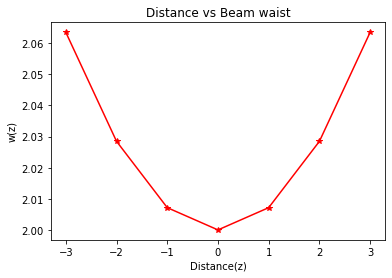

In [8]:
#some calculated data
x_0= 0
y_0 = 0
w=1
w_0=2
lam=1.064 #NdYag laser wave length 1064 nm

z_r=(math.pi*(w_0)**2)/lam # rayleigh length

z=1
w_z = w_0*math.sqrt(1+(z/z_r)**2) # wasit at z position
print("Rayleigh length(nm): ", z)
print("Wasit at z position(nm): ", w_z)
#%%
x=[-3,-2,-1,0,1,2,3]
y=[2.063513251741481,2.0284736396405934,2.0071562785889867,2.0,2.0071562785889867,2.0284736396405934,2.063513251741481]
# measured data
figure()
plot(x, y, 'r*-')
xlabel('Distance(z)')
ylabel('w(z)')
title('Distance vs Beam waist')
show()


## 3 Interferometric Measurement
Intensity distribution resulted from the coherent superposition of two electric field


C:\Users\Firoj\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Firoj\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Firoj\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


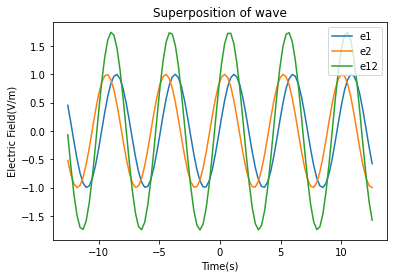

In [9]:
t=np.linspace(-(4*np.pi), 4*np.pi, 100)

lamd = 0.633e-3 # wavelength in mm

z=20
a1= 1 # amplitude of wave
a2=a1 # considering aplitude of both wave same
b2=0 # wave phase angle
b1=45 # phase shift wave 1 to wave 2 is 30

k= (2*np.pi)/lamd
#w=np.pi/2
w=2*np.pi/lamd # wave angular velocity 
#electric field
e1 = a1*np.exp(-1j*(k*z-w*t+b1)) ##parallal, wave 1
e2 = a2*np.exp(-1j*(k*(z)-w*t+b2)) #wave 2

e12 = e1+e2 # superposition wave 3


i = a1**2 + a2**2 + 2*a1*a2*np.cos(b1-b2) # intensity of two superposition wave field


# plotting
fig, ax = plt.subplots()

ax.plot(t,e1, label="e1")
ax.plot(t,e2, label="e2")
ax.plot(t,e12, label="e12")


ax.legend(loc=1); # upper right corner
ax.set_xlabel('Time(s)')
ax.set_ylabel('Electric Field(V/m)')
ax.set_title('Superposition of wave')
plt.show()

### Investigating the relationship between interference pattern and tilt angle of the object mirror.

Zemaxfile:  F:\MScEE\LaserAp\project\project_3\presentation\code\tilt_90_04.txt


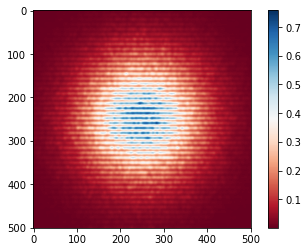

Text(0, 0.5, 'Intensity(watt/cm^2')

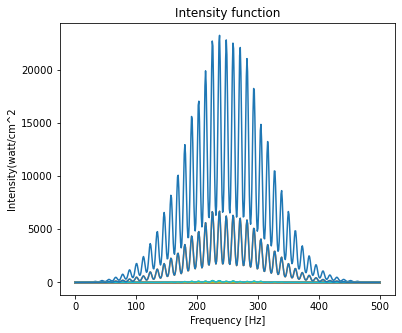

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import fftpack



def ZmxDetToArray(zmxfilename):
    import codecs
    import numpy as np
    #assumes 'utf-16' for old Zemax versions change to 'utf-8'
    f_tmp = codecs.open(zmxfilename, encoding='utf-16')
    L = []
    for line in f_tmp:
        S = line.split()
        L.append(S[1::]) 
    width = float(L[8][0])
    height = float(L[8][3])
    N_pixel_width = float(L[8][7])
    N_pixel_height = float(L[8][10])
    L = L[24::] 
    for i in range(len(L)):
        for ii in range(len(L[i])):
            L[i][ii] = float(L[i][ii])
    pixel_data = np.array(L)
    pixel_size = (width / N_pixel_width, height / N_pixel_height)
    return pixel_data, pixel_size


cwd = os.getcwd()  
# path of data txt file
zmxfilename = r'F:\MScEE\LaserAp\project\project_3\presentation\code\tilt_90_04.txt'
zmxfilename = os.path.join(cwd, zmxfilename)
pixel_data, pixel_size = ZmxDetToArray(zmxfilename)
print('Zemaxfile: ',zmxfilename)

plt.imshow(pixel_data,cmap='RdBu')
plt.colorbar() 
plt.show() 

#%%# The FFT of the signal 
Pixel_fft = fftpack.fft(pixel_data)

I = np.abs(Pixel_fft)**2

# The corresponding frequencies
# Plot the FFT Intensity
plt.figure(figsize=(6, 5))
plt.plot(I)
plt.title('Intensity function')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Intensity(watt/cm^2')